<a href="https://colab.research.google.com/github/NehaSontakk/BATH-Analytics/blob/main/Contig_comparison_identifying_gaps_Prokka_vs_BATH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install gffpandas

In [ ]:
!sudo apt-get install bedops

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
bedops is already the newest version (2.4.40+dfsg-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [ ]:
!pip install biopython

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt
import gffpandas.gffpandas as gffpd
from Bio import SeqIO

### Take the prokka file, divide it up into contigs and convert it to json

In [ ]:
annotation = gffpd.read_gff3('/content/drive/MyDrive/Lab Work/Parkinsons_Data/Examples/bin82/bin_82_prokka_annotation.gff')
combined_df = annotation.filter_feature_of_type(['CDS'])
attr_to_columns = combined_df.attributes_to_columns()
prokka_proteins = pd.DataFrame(attr_to_columns)
prokka_proteins['start'] = prokka_proteins['start'].astype(int)
prokka_proteins['end'] = prokka_proteins['end'].astype(int)

In [ ]:
prokka_proteins

,seq_id,source,type,start,end,score,strand,phase,attributes,ID,Name,db_xref,eC_number,gene,inference,locus_tag,note,product
0,k127_1013475,Prodigal:002006,CDS,28,825,.,+,0,ID=CKDIDOFJ_00001;eC_number=7.1.1.-;Name=ndhH;...,CKDIDOFJ_00001,ndhH,COG:COG0649,7.1.1.-,ndhH,"ab initio prediction:Prodigal:002006,similar t...",CKDIDOFJ_00001,None,NAD(P)H-quinone oxidoreductase subunit H
1,k127_1013475,Prodigal:002006,CDS,904,2010,.,+,0,ID=CKDIDOFJ_00002;eC_number=7.1.1.-;Name=nuoH;...,CKDIDOFJ_00002,nuoH,COG:COG1005,7.1.1.-,nuoH,"ab initio prediction:Prodigal:002006,similar t...",CKDIDOFJ_00002,None,NADH-quinone oxidoreductase subunit H
2,k127_1013475,Prodigal:002006,CDS,2108,3613,.,+,0,ID=CKDIDOFJ_00003;eC_number=7.1.2.2;Name=atpD;...,CKDIDOFJ_00003,atpD,COG:COG0055,7.1.2.2,atpD,"ab initio prediction:Prodigal:002006,similar t...",CKDIDOFJ_00003,None,ATP synthase subunit beta
3,k127_1013475,Prodigal:002006,CDS,3678,3914,.,+,0,ID=CKDIDOFJ_00004;Name=atpC;gene=atpC;inferenc...,CKDIDOFJ_00004,atpC,None,None,atpC,"ab initio prediction:Prodigal:002006,protein m...",CKDIDOFJ_00004,None,ATP synthase epsilon chain
4,k127_1013475,Prodigal:002006,CDS,3944,5182,.,+,0,ID=CKDIDOFJ_00005;Name=atpB;gene=atpB;inferenc...,CKDIDOFJ_00005,atpB,None,None,atpB,"ab initio prediction:Prodigal:002006,protein m...",CKDIDOFJ_00005,None,ATP synthase subunit a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1840,k127_797108,Prodigal:002006,CDS,137812,140454,.,+,0,ID=CKDIDOFJ_01841;Name=secA_2;db_xref=COG:COG0...,CKDIDOFJ_01841,secA_2,COG:COG0653,None,secA_2,"ab initio prediction:Prodigal:002006,similar t...",CKDIDOFJ_01841,None,Protein translocase subunit SecA
1841,k127_797108,Prodigal:002006,CDS,140456,142891,.,-,0,ID=CKDIDOFJ_01842;inference=ab initio predicti...,CKDIDOFJ_01842,None,None,None,None,ab initio prediction:Prodigal:002006,CKDIDOFJ_01842,None,hypothetical protein
1843,k127_797108,Prodigal:002006,CDS,143585,145075,.,+,0,ID=CKDIDOFJ_01844;inference=ab initio predicti...,CKDIDOFJ_01844,None,None,None,None,ab initio prediction:Prodigal:002006,CKDIDOFJ_01844,None,hypothetical protein
1844,k127_797108,Prodigal:002006,CDS,145259,146500,.,-,0,ID=CKDIDOFJ_01845;eC_number=2.6.1.-;Name=epsN_...,CKDIDOFJ_01845,epsN_3,COG:COG0399,2.6.1.-,epsN_3,"ab initio prediction:Prodigal:002006,similar t...",CKDIDOFJ_01845,None,Putative pyridoxal phosphate-dependent aminotr...


In [ ]:
for seq_id in prokka_proteins['seq_id'].unique():
    df_filtered = prokka_proteins[prokka_proteins['seq_id'] == seq_id][['seq_id', 'start', 'end', 'strand', 'ID', 'product']]
    df_filtered.rename(columns={'seq_id': 'id', 'ID': 'family'}, inplace=True)
    json_str = df_filtered.to_json(orient='records', lines=False)
    directory = '/content/drive/MyDrive/Lab Work/Parkinsons_Data/Organized/JSON/Prokka_Annotation_JSON/'
    os.makedirs(directory, exist_ok=True)
    filename = f'{directory}Prokka_annotation_{seq_id}.json'
    with open(filename, 'w') as file:
        file.write(json_str)

In [ ]:
prokka_proteins[['seq_id', 'start', 'end', 'strand', 'ID', 'product']].rename(columns={'seq_id': 'id', 'ID': 'family'}, inplace=True)
json_str2 = prokka_proteins[['seq_id', 'start', 'end', 'strand', 'ID', 'product']].to_json(orient='records', lines=False)
with open("Prokka_090524.json", 'w') as file:
        file.write(json_str2)

<ipython-input-36-b98d573e1272>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prokka_proteins[['seq_id', 'start', 'end', 'strand', 'ID', 'product']].rename(columns={'seq_id': 'id', 'ID': 'family'}, inplace=True)


### Take the BATH file, get each contig out, make it a JSON file

In [ ]:
bath_protein = pd.read_excel("/content/drive/MyDrive/Lab Work/Parkinsons_Data/Examples/bin82/xxx.xlsx")
unnamed_cols = [col for col in bath_protein.columns if col.startswith('Unnamed')]
bath_protein.drop(columns=unnamed_cols, inplace=True)

In [ ]:
for target_name in bath_protein['target name'].unique():
    df_filtered = bath_protein[bath_protein['target name'] == target_name]
    json_str = df_filtered.to_json(orient='records', lines=False)
    directory = '/content/drive/MyDrive/Lab Work/Parkinsons_Data/Organized/JSON/BATH_Annotation_JSON/'
    os.makedirs(directory, exist_ok=True)
    filename = f'{directory}Bath_protein_annotation_{target_name}.json'
    with open(filename, 'w') as file:
        file.write(json_str)

In [ ]:
bath_protein.columns

Index(['target name', 'accession', 'query name', 'accession1', 'hmm len',
       'hmm from', 'hmm to', 'seq len', 'ali from', 'ali to', 'env from',
       'env to', 'E-value', 'score', 'bias', 'shifts', 'stops', 'pipe',
       'description of target', 'strand', 'ali from flip', 'ali to flip',
       'origin'],
      dtype='object')

In [ ]:
bath_protein['start'] = bath_protein['ali from']
bath_protein['end'] = bath_protein['ali to']
bath_protein['start'].fillna(bath_protein['ali from flip'],inplace=True)
bath_protein['end'].fillna(bath_protein['ali to flip'],inplace=True)

In [ ]:
bath_proteinnew = bath_protein[['target name', 'start', 'end', 'strand', 'description of target', 'query name']].rename(columns={'target name': 'seq_id', 'query name': 'family','description of target':'product'})
json_str3 = bath_proteinnew[['seq_id', 'start', 'end', 'strand', 'family', 'product']].to_json(orient='records', lines=False)
with open("BATH_090524.json", 'w') as file:
        file.write(json_str3)

## Find the gaps filled by BATH vs Prokka per contig

In [ ]:
#Seperate BATH out into positive and negative
bath_protein['ID'] = bath_protein['query name']
pos_strand = bath_protein[bath_protein['strand']=="+"]
neg_strand = bath_protein[bath_protein['strand']=="-"]

#Dividing BATH and Prokka files into positive and negative strand

prokka_proteins['start'] = prokka_proteins['start'].astype(int)
prokka_proteins['end'] = prokka_proteins['end'].astype(int)

pos_strand['start'] = pos_strand['ali from'].astype(int)
pos_strand['end'] = pos_strand['ali to'].astype(int)

neg_strand['start'] = neg_strand['ali from flip'].astype(int)
neg_strand['end'] = neg_strand['ali to flip'].astype(int)

# Filter for positive strand in prokka_proteins
prokka_proteins_plus = prokka_proteins[prokka_proteins['strand'] == '+']
prokka_proteins_plus.sort_values("start",inplace=True)
prokka_proteins_plus[['seq_id', 'start', 'end', 'strand', 'ID', 'inference']].to_csv('prokka_proteins_plus.bed', sep='\t', index=False, header=False)

# Filter for negative strand in prokka_proteins
prokka_proteins_minus = prokka_proteins[prokka_proteins['strand'] == '-']
prokka_proteins_minus.sort_values("start",inplace=True)
prokka_proteins_minus[['seq_id', 'start', 'end', 'strand', 'ID', 'inference']].to_csv('prokka_proteins_minus.bed', sep='\t', index=False, header=False)

# Repeat the process for bath_deduplicated
bath_deduplicated_plus = pos_strand[['target name','start','end','strand','ID','shifts']].copy()
bath_deduplicated_plus.sort_values("start",inplace=True)
bath_deduplicated_plus.to_csv('bath_deduplicated_plus.bed', sep='\t', index=False, header=False)

bath_deduplicated_minus = neg_strand[['target name','start','end','strand','ID','shifts']].copy()
bath_deduplicated_minus.sort_values("start",inplace=True)
bath_deduplicated_minus.to_csv('bath_deduplicated_minus.bed', sep='\t', index=False, header=False)

<ipython-input-24-45d62bcd1389>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pos_strand['start'] = pos_strand['ali from'].astype(int)
<ipython-input-24-45d62bcd1389>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pos_strand['end'] = pos_strand['ali to'].astype(int)
<ipython-input-24-45d62bcd1389>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.

In [ ]:
bath_deduplicated_minus

,target name,start,end,strand,ID,shifts
759,k127_748425,1,177,-,Q9ZDJ5,0
832,k127_797108,276,1454,-,Q45374,0
798,k127_795063,1422,2690,-,Q97QS2,0
833,k127_797108,1618,3096,-,P27000,0
606,k127_2086219,2471,3076,-,Q02DZ3,0
...,...,...,...,...,...,...
601,k127_2074107,242399,243844,-,Q57252,0
602,k127_2074107,245342,246391,-,P0AAT4,0
603,k127_2074107,272882,273697,-,P37321,0
604,k127_2074107,279621,280997,-,P71040,0


In [ ]:
import os

def generate_bed_files(df, directory, contig_column, file_prefix='Prokka_annotation'):
    """
    Generates BED files for each unique 'seq_id' in the DataFrame.

    Parameters:
    - df: DataFrame to process.
    - directory: Path to the directory where BED files will be saved.
    - contig_column: Name of column with contig names
    - file_prefix: Prefix for the BED files' names. Default is 'Prokka_annotation'.
    """
    os.makedirs(directory, exist_ok=True)
    for seq_id in df[contig_column].unique():
        df_seq = df[df[contig_column] == seq_id]
        df_seq = df[df[contig_column] == seq_id].sort_values(by=['start'])
        filename = f'{directory}/{file_prefix}_{seq_id}.bed'
        with open(filename, 'w') as file:
            for _, row in df_seq.iterrows():
              if file_prefix == "Prokka_annotation":
                bed_line = f"{row[contig_column]}\t{row['start']}\t{row['end']}\t{row['ID']}\t{row['strand']}\t{row['inference']}\n"
                file.write(bed_line)
              else:
                bed_line = f"{row[contig_column]}\t{row['start']}\t{row['end']}\t{row['ID']}\t{row['strand']}\t{row['shifts']}\n"
                file.write(bed_line)

    print(f"BED files have been successfully generated in {directory}")

directory = '/content/drive/MyDrive/Lab Work/Parkinsons_Data/Organized/BED/Prokka_Annotation_PLUS_BED/'
generate_bed_files(prokka_proteins_plus, directory, 'seq_id',file_prefix='Prokka_annotation')

directory2 = '/content/drive/MyDrive/Lab Work/Parkinsons_Data/Organized/BED/Prokka_Annotation_MINUS_BED/'
generate_bed_files(prokka_proteins_minus, directory2, 'seq_id',file_prefix='Prokka_annotation')

directory3 = '/content/drive/MyDrive/Lab Work/Parkinsons_Data/Organized/BED/BATH_Annotation_PLUS_BED/'
generate_bed_files(bath_deduplicated_plus, directory3, 'target name',file_prefix='BATH_annotation')

directory4 = '/content/drive/MyDrive/Lab Work/Parkinsons_Data/Organized/BED/BATH_Annotation_MINUS_BED/'
generate_bed_files(bath_deduplicated_minus, directory4, 'target name',file_prefix='BATH_annotation')

BED files have been successfully generated in /content/drive/MyDrive/Lab Work/Parkinsons_Data/Organized/BED/Prokka_Annotation_PLUS_BED/
BED files have been successfully generated in /content/drive/MyDrive/Lab Work/Parkinsons_Data/Organized/BED/Prokka_Annotation_MINUS_BED/
BED files have been successfully generated in /content/drive/MyDrive/Lab Work/Parkinsons_Data/Organized/BED/BATH_Annotation_PLUS_BED/
BED files have been successfully generated in /content/drive/MyDrive/Lab Work/Parkinsons_Data/Organized/BED/BATH_Annotation_MINUS_BED/


In [ ]:
import subprocess

def run_bedmap_overlap(bed_file1, bed_file2, output_file):
    """Run bedmap to find overlaps between two BED files and filter out lines with no valid second element after splitting."""
    command = [
        "bedmap", "--echo", "--echo-map", "--delim", ";", bed_file1, bed_file2
    ]
    result = subprocess.run(command, capture_output=True, text=True, check=True)

    with open(output_file, 'w') as f_output:
        for line in result.stdout.splitlines():
            parts = line.split(';')
            if len(parts) > 1 and parts[1].strip():
                f_output.write(line + '\n')

def run_bedmap_unique(bed_file1, bed_file2, output_file, unique_to_first=True):
    """
    Run bedmap to find items unique to the first or second BED file.
    unique_to_first: If True, find items unique to bed_file1; otherwise, find items unique to bed_file2.
    """
    if unique_to_first:
        indicator_command = ["bedmap", "--echo", "--indicator", bed_file1, bed_file2]
    else:
        indicator_command = ["bedmap", "--echo", "--indicator", bed_file2, bed_file1]

    with open(output_file, 'w') as f_output, subprocess.Popen(indicator_command, stdout=subprocess.PIPE, text=True) as proc:
        for line in proc.stdout:
            if line.strip().endswith("0"):
                f_output.write(line.split('|')[0] + '\n')

bed_file1 = '/content/drive/MyDrive/Lab Work/Parkinsons_Data/Organized/BED/BATH_Annotation_PLUS_BED/BATH_annotation_k127_39946.bed'
bed_file2 = '/content/drive/MyDrive/Lab Work/Parkinsons_Data/Organized/BED/Prokka_Annotation_PLUS_BED/Prokka_annotation_k127_39946.bed'
overlap_output = 'overlap_prokka_bath_k127_39946.bed'
unique_to_bath_output = 'unique_bath_k127_39946.bed'
unique_to_prokka_output = 'unique_prokka_k127_39946.bed'
run_bedmap_overlap(bed_file1, bed_file2, overlap_output)
run_bedmap_unique(bed_file1, bed_file2, unique_to_bath_output, unique_to_first=True)
run_bedmap_unique(bed_file1, bed_file2, unique_to_prokka_output, unique_to_first=False)

In [ ]:
import os
import subprocess
from pathlib import Path

def run_bedmap_operations(bath_bed_path, prokka_bed_path, output_base_dir):
    seq_id = bath_bed_path.stem.split('_')[-1]
    overlap_output = output_base_dir / f'overlap_prokka_bath_{seq_id}.bed'
    unique_to_bath_output = output_base_dir / f'unique_to_bath_{seq_id}.bed'
    unique_to_prokka_output = output_base_dir / f'unique_to_prokka_{seq_id}.bed'

    output_base_dir.mkdir(parents=True, exist_ok=True)

    # Command for bedmap to find overlaps
    command = ["bedmap", "--echo", "--echo-map", "--delim", ";", str(bath_bed_path), str(prokka_bed_path)]

    # Run the command and capture output
    result = subprocess.run(command, capture_output=True, text=True, check=True)

    # Filter the output and write to overlap_output
    with open(overlap_output, 'w') as f_output:
        for line in result.stdout.splitlines():
            parts = line.split(';')
            # Check if there is more than one part and the second part is not empty
            if len(parts) > 1 and parts[1].strip():
                f_output.write(line + '\n')

    # Run bedmap for unique to BATH
    subprocess.run(["bedops", "--not-element-of", "1", str(bath_bed_path), str(prokka_bed_path)], stdout=open(unique_to_bath_output, 'w'), check=True)

    # Run bedmap for unique to Prokka
    subprocess.run(["bedops", "--not-element-of", "1", str(prokka_bed_path), str(bath_bed_path)], stdout=open(unique_to_prokka_output, 'w'), check=True)

def find_and_process_bed_pairs(bath_dir, prokka_dir, output_dir):
    bath_dir_path = Path(bath_dir)
    prokka_dir_path = Path(prokka_dir)
    output_base_dir = Path(output_dir)

    bath_bed_files = {f.stem.split('_')[-1]: f for f in bath_dir_path.glob('BATH_annotation_*.bed')}
    prokka_bed_files = {f.stem.split('_')[-1]: f for f in prokka_dir_path.glob('Prokka_annotation_*.bed')}

    for seq_id, bath_bed_path in bath_bed_files.items():
        prokka_bed_path = prokka_bed_files.get(seq_id)
        if prokka_bed_path:
            run_bedmap_operations(bath_bed_path, prokka_bed_path, output_base_dir)
        else:
            print(f"No matching Prokka file found for BATH seq_id: {seq_id}")

bath_dir = '/content/drive/MyDrive/Lab Work/Parkinsons_Data/Organized/BED/BATH_Annotation_PLUS_BED'
prokka_dir = '/content/drive/MyDrive/Lab Work/Parkinsons_Data/Organized/BED/Prokka_Annotation_PLUS_BED'
output_dir = '/content/drive/MyDrive/Lab Work/Parkinsons_Data/Organized/BED/Overlaps and Differences'

find_and_process_bed_pairs(bath_dir, prokka_dir, output_dir)


In [ ]:
from glob import glob

In [ ]:
from pathlib import Path

def combine_files_by_prefix(source_directory, output_directory, prefixes):
    source_directory = Path(source_directory)
    output_directory = Path(output_directory)
    output_directory.mkdir(parents=True, exist_ok=True)
    file_groups = {prefix: [] for prefix in prefixes}
    for file_path in source_directory.glob('*.bed'):
        for prefix in prefixes:
            if file_path.name.startswith(prefix):
                file_groups[prefix].append(file_path)
    for prefix, files in file_groups.items():
        combined_file_path = output_directory / f"{prefix}combined.bed"
        with combined_file_path.open('w') as combined_file:
            for file_path in files:
                with file_path.open() as input_file:
                    combined_file.write(input_file.read())
                combined_file.write('\n')


source_dir = '/content/drive/MyDrive/Lab Work/Parkinsons_Data/Organized/BED/Overlaps and Differences'
output_dir = '/content/drive/MyDrive/Lab Work/Parkinsons_Data/Organized/BED/Combined Files'
prefixes = ['unique_to_prokka_', 'unique_to_bath_', 'overlap_prokka_bath_']
combine_files_by_prefix(source_dir, output_dir, prefixes)


### Analysis

#### Area of annotation covered by Prokka

In [ ]:
bath_protein['seq_id'] = bath_protein['target name']

In [ ]:
fasta_file = '/content/drive/MyDrive/Lab Work/Parkinsons_Data/Examples/bin82/bin82 MAG Data/bin.82.fa.fna'

contigs_list = []
with open(fasta_file, "r") as handle:
    for record in SeqIO.parse(handle, "fasta"):
        contigs_list.append({'seq_id': record.id, 'length': len(record.seq)})

contigs_info = pd.DataFrame(contigs_list)

In [ ]:
annotated_prokka_proteins = prokka_proteins[prokka_proteins['product'] != 'hypothetical protein']
non_annotated_proteins = prokka_proteins[prokka_proteins['product'] == 'hypothetical protein']

In [ ]:
non_annotated_proteins.shape

(1005, 18)

In [ ]:
def calculate_covered_length(df, seq_id):
    covered_points = set()
    for _, row in df[df['seq_id'] == seq_id].iterrows():
        start, end = row['start'], row['end']
        interval_points = set(range(start, end + 1))
        covered_points |= interval_points
    return len(covered_points)

In [ ]:
contigs_info

,seq_id,length
0,k127_1013475,183529
1,k127_2417308,46544
2,k127_1836396,58147
3,k127_39946,74930
4,k127_1041423,87228
5,k127_3066123,178996
6,k127_2074107,287621
7,k127_2086219,105609
8,k127_486726,181032
9,k127_507392,20147


In [ ]:
bath_protein.columns

Index(['target name', 'accession', 'query name', 'accession1', 'hmm len',
       'hmm from', 'hmm to', 'seq len', 'ali from', 'ali to', 'env from',
       'env to', 'E-value', 'score', 'bias', 'shifts', 'stops', 'pipe',
       'description of target', 'strand', 'ali from flip', 'ali to flip',
       'origin', 'ID', 'seq_id'],
      dtype='object')

In [ ]:
bath_protein = pd.concat([pos_strand,neg_strand])
bath_protein['seq_id'] = bath_protein['target name']
for _, contig in contigs_info.iterrows():
    seq_id = contig['seq_id']
    contig_length = contig['length']
    # Calculate covered length for Prokka and BATH annotations
    total_unannotated = calculate_covered_length(non_annotated_proteins, seq_id)
    total_covered_prokka = calculate_covered_length(annotated_prokka_proteins, seq_id)
    total_covered_bath = calculate_covered_length(bath_protein, seq_id)
    uncovered_length_prodigal = contig_length - total_unannotated
    uncovered_length_prokka = contig_length - total_covered_prokka
    uncovered_length_bath = contig_length - total_covered_bath
    contig_uncovered = contig_length - total_covered_prokka - total_unannotated
    print("Total left:", contig_uncovered)
    print(f"Contig {seq_id}: Prokka ORF = {total_unannotated}, Prokka ORF = {uncovered_length_prodigal}")
    print(f"Contig {seq_id}: BATH covered = {total_covered_bath}, BATH Uncovered = {uncovered_length_bath}")
    print(f"Contig {seq_id}: Prokka covered = {total_covered_prokka}, Prokka Uncovered = {uncovered_length_prokka}")

Total left: 20472
Contig k127_1013475: Prokka ORF = 75497, Prokka ORF = 108032
Contig k127_1013475: BATH covered = 67171, BATH Uncovered = 116358
Contig k127_1013475: Prokka covered = 87560, Prokka Uncovered = 95969
Total left: 6562
Contig k127_2417308: Prokka ORF = 17088, Prokka ORF = 29456
Contig k127_2417308: BATH covered = 14952, BATH Uncovered = 31592
Contig k127_2417308: Prokka covered = 22894, Prokka Uncovered = 23650
Total left: 7049
Contig k127_1836396: Prokka ORF = 25776, Prokka ORF = 32371
Contig k127_1836396: BATH covered = 22564, BATH Uncovered = 35583
Contig k127_1836396: Prokka covered = 25322, Prokka Uncovered = 32825
Total left: 9731
Contig k127_39946: Prokka ORF = 30903, Prokka ORF = 44027
Contig k127_39946: BATH covered = 29619, BATH Uncovered = 45311
Contig k127_39946: Prokka covered = 34296, Prokka Uncovered = 40634
Total left: 13358
Contig k127_1041423: Prokka ORF = 37341, Prokka ORF = 49887
Contig k127_1041423: BATH covered = 31002, BATH Uncovered = 56226
Contig 

In [ ]:
contigs_info['total_prodigal'] = 0
contigs_info['total_covered_prokka'] = 0
contigs_info['total_covered_bath'] = 0
contigs_info['total_uncovered_prokka'] = 0
contigs_info['total_uncovered_bath'] = 0
contigs_info['contig_length'] = 0

for _, contig in contigs_info.iterrows():
    seq_id = contig['seq_id']
    contig_length = contig['length']

    total_prodigal = calculate_covered_length(non_annotated_proteins, seq_id)
    total_covered_prokka = calculate_covered_length(annotated_prokka_proteins, seq_id)
    total_covered_bath = calculate_covered_length(bath_protein, seq_id)

    contigs_info.loc[contigs_info['seq_id'] == seq_id, 'total_prodigal'] = total_prodigal
    contigs_info.loc[contigs_info['seq_id'] == seq_id, 'total_covered_prokka'] = total_covered_prokka
    contigs_info.loc[contigs_info['seq_id'] == seq_id, 'total_covered_bath'] = total_covered_bath
    contigs_info.loc[contigs_info['seq_id'] == seq_id, 'contig_length'] = contig['length']


contigs_info['percent_covered_prokka'] = (contigs_info['total_covered_prokka'] / contigs_info['contig_length']) * 100
contigs_info['percent_covered_prodigal'] = (contigs_info['total_prodigal'] / contigs_info['contig_length']) * 100
contigs_info['percent_uncovered_prokka'] = 100 - contigs_info['percent_covered_prokka'] - contigs_info['percent_covered_prodigal']

contigs_info['percent_covered_bath'] = (contigs_info['total_covered_bath'] / contigs_info['contig_length']) * 100
contigs_info['percent_uncovered_bath'] = 100 - contigs_info['percent_covered_bath']

<ipython-input-40-916b28cb7a52>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


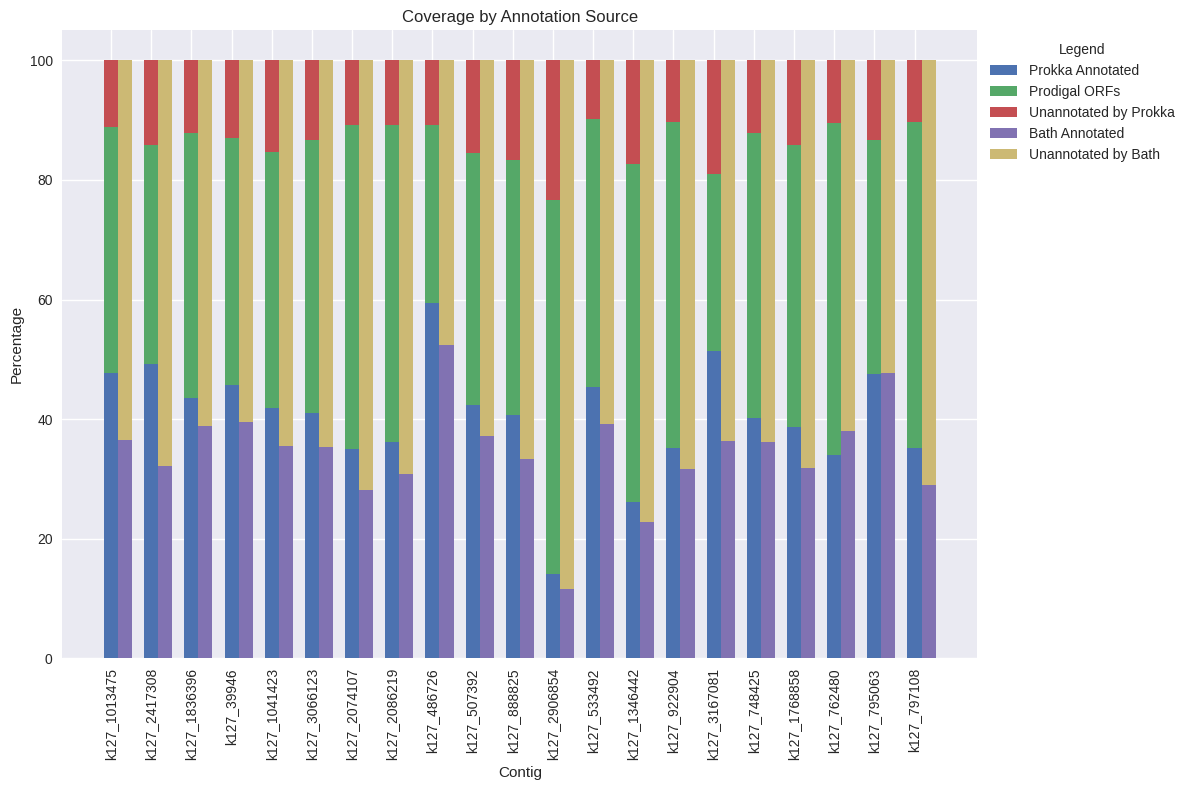

In [ ]:
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize=(12, 8))
n_contigs = len(contigs_info)
index = range(n_contigs)
bar_width = 0.35

bar2 = ax.bar(index, contigs_info['percent_covered_prokka'], bar_width, label='Prokka Annotated')
bar1 = ax.bar(index, contigs_info['percent_covered_prodigal'], bar_width, bottom=contigs_info['percent_covered_prokka'], label='Prodigal ORFs')
bar3 = ax.bar(index, contigs_info['percent_uncovered_prokka'], bar_width, bottom=contigs_info['percent_covered_prodigal']+contigs_info['percent_covered_prokka'], label='Unannotated by Prokka')

bar4 = ax.bar([p + bar_width for p in index], contigs_info['percent_covered_bath'], bar_width, label='Bath Annotated')
bar5 = ax.bar([p + bar_width for p in index], contigs_info['percent_uncovered_bath'], bar_width, bottom=contigs_info['percent_covered_bath'], label='Unannotated by Bath')

ax.set_xlabel('Contig')
ax.set_ylabel('Percentage')
ax.set_title('Coverage by Annotation Source')
indices = range(n_contigs)
ax.set_xticks(indices)
ax.set_xticklabels(contigs_info['seq_id'], rotation=90)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1), title="Legend")
plt.tight_layout()
plt.show()

#### Venn diagram of region based overlaps

In [ ]:
def transform_file_to_dataframe(file_path):
    transformed_rows = []

    with open(file_path, 'r') as file:
        lines = file.readlines()
        for line in lines:
            fields = line.strip().split(';')
            if len(fields) == 3:
                new_row1 = [fields[0], fields[1]]
                new_row2 = [fields[0], fields[2]]
                transformed_rows.append(new_row1)
                transformed_rows.append(new_row2)
            else:
                transformed_rows.append(fields)
    df = pd.DataFrame(transformed_rows, columns=['BATH', 'Prokka']).replace("\n",np.nan).dropna()

    return df

In [ ]:
file_path = '/content/drive/MyDrive/Lab Work/Parkinsons_Data/Organized/BED/Combined Files/overlap_prokka_bath_combined.bed'
overlaps = transform_file_to_dataframe(file_path)

In [ ]:
overlaps.to_excel("test.xlsx")

In [ ]:
def determine_label(row):
    if row['Prokka'].endswith('ab initio prediction:Prodigal:002006'):
        return "BATH and Prokka Unannotated"
    else:
        return "BATH and Prokka Annotated"

overlaps['label'] = overlaps.apply(determine_label, axis=1)

In [ ]:
overlaps

,BATH,Prokka,label
0,k127_1013475\t1\t822\tP27724\t+\t0,k127_1013475\t28\t825\tCKDIDOFJ_00001\t+\tab i...,BATH and Prokka Annotated
1,k127_1013475\t982\t1986\tP9WIX1\t+\t0,k127_1013475\t904\t2010\tCKDIDOFJ_00002\t+\tab...,BATH and Prokka Annotated
2,k127_1013475\t2120\t3586\tQ8DLG8\t+\t0,k127_1013475\t2108\t3613\tCKDIDOFJ_00003\t+\ta...,BATH and Prokka Annotated
3,k127_1013475\t4448\t5059\tO05330\t+\t0,k127_1013475\t3944\t5182\tCKDIDOFJ_00005\t+\ta...,BATH and Prokka Annotated
4,k127_1013475\t6313\t6843\tQ0ZS22\t+\t0,k127_1013475\t6301\t6852\tCKDIDOFJ_00008\t+\ta...,BATH and Prokka Annotated
...,...,...,...
474,k127_2417308\t29202\t29744\tP10442\t+\t0,k127_2417308\t29160\t29771\tCKDIDOFJ_00167\t+\...,BATH and Prokka Annotated
475,k127_2417308\t37705\t38322\tQ72J35\t+\t0,k127_2417308\t37675\t38328\tCKDIDOFJ_00176\t+\...,BATH and Prokka Annotated
476,k127_2417308\t40446\t41576\tP16609\t+\t0,k127_2417308\t40278\t41642\tCKDIDOFJ_00181\t+\...,BATH and Prokka Annotated
477,k127_2417308\t42154\t42633\tA0QTP2\t+\t0,k127_2417308\t42148\t42651\tCKDIDOFJ_00182\t+\...,BATH and Prokka Annotated


In [ ]:
file_path = '/content/drive/MyDrive/Lab Work/Parkinsons_Data/Organized/BED/Combined Files/unique_to_bath_combined.bed'
with open(file_path, 'r') as file:
    lines = [line.strip() for line in file.readlines() if line.strip()]
unique_to_bath = pd.DataFrame(lines, columns=['BATH']).replace("\n",np.nan).dropna()
unique_to_bath['Prokka'] = np.nan
unique_to_bath['label'] = 'BATH'

In [ ]:
file_path3 = '/content/drive/MyDrive/Lab Work/Parkinsons_Data/Organized/BED/Combined Files/unique_to_prokka_combined.bed'
with open(file_path3, 'r') as file:
    lines = [line.strip() for line in file.readlines() if line.strip()]
unique_to_prokka = pd.DataFrame(lines, columns=['Prokka']).replace("\n",np.nan).dropna()
unique_to_prokka['BATH'] = np.nan

def determine_label2(row):
    if row['Prokka'].endswith('ab initio prediction:Prodigal:002006'):
        return "Prokka Unannotated"
    else:
        return "Prokka Annotated"

unique_to_prokka['label'] = unique_to_prokka.apply(determine_label2, axis=1)

In [ ]:
venn_data = pd.concat([unique_to_prokka,unique_to_bath,overlaps])

In [ ]:
venn_data.to_excel("/content/drive/MyDrive/Lab Work/Parkinsons_Data/Organized/Alignment_Overlaps_Unique_Bedmap_Output.xlsx",index=False)

In [ ]:
venn_data['label'].value_counts()

Prokka Unannotated             437
BATH and Prokka Annotated      394
BATH and Prokka Unannotated     66
Prokka Annotated                42
BATH                             8
Name: label, dtype: int64

In [ ]:
venn_data[venn_data['label'] == "Prokka Unannotated"]

,Prokka,BATH,label
4,k127_1013475\t53409\t54473\tCKDIDOFJ_00044\t+\...,NaN,Prokka Unannotated
5,k127_1013475\t60459\t61694\tCKDIDOFJ_00049\t+\...,NaN,Prokka Unannotated
6,k127_1013475\t70015\t70173\tCKDIDOFJ_00054\t+\...,NaN,Prokka Unannotated
7,k127_1013475\t70197\t70733\tCKDIDOFJ_00055\t+\...,NaN,Prokka Unannotated
8,k127_1013475\t86464\t87375\tCKDIDOFJ_00072\t+\...,NaN,Prokka Unannotated
...,...,...,...
473,k127_795063\t57032\t57814\tCKDIDOFJ_01729\t+\t...,NaN,Prokka Unannotated
474,k127_2417308\t18\t3848\tCKDIDOFJ_00144\t+\tab ...,NaN,Prokka Unannotated
475,k127_2417308\t25438\t26331\tCKDIDOFJ_00161\t+\...,NaN,Prokka Unannotated
476,k127_2417308\t26398\t27162\tCKDIDOFJ_00162\t+\...,NaN,Prokka Unannotated


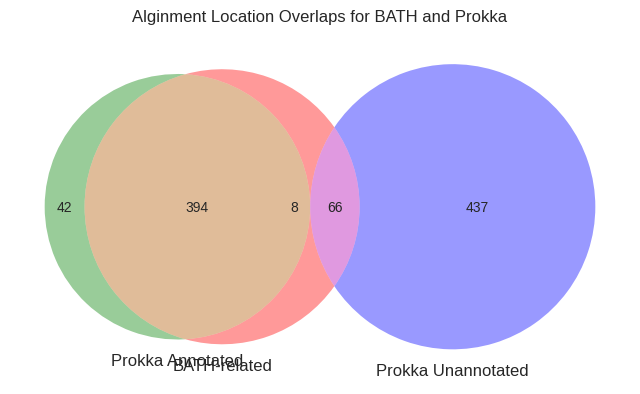

In [ ]:
from matplotlib_venn import venn3
import matplotlib.pyplot as plt

# Assuming venn_data is your DataFrame
venn_counts = {
    '100': venn_data[venn_data['label'] == "BATH"].shape[0],  # Only BATH
    '010': venn_data[venn_data['label'] == "Prokka Annotated"].shape[0],  # Only Prokka Annotated
    '001': venn_data[venn_data['label'] == "Prokka Unannotated"].shape[0],  # Only Prokka Unannotated
    '110': venn_data[venn_data['label'] == "BATH and Prokka Annotated"].shape[0],  # Intersection BATH and Prokka Annotated
    '101': venn_data[venn_data['label'] == "BATH and Prokka Unannotated"].shape[0],  # Intersection BATH and Prokka Unannotated
    '011': 0,  # Intersection of Prokka Annotated and Prokka Unannotated (not given)
    '111': 0   # Intersection of all three (not applicable)
}

venn3(subsets=venn_counts, set_labels=('BATH-related', 'Prokka Annotated', 'Prokka Unannotated'))
plt.title("Alginment Location Overlaps for BATH and Prokka")
plt.show()


### Checking frameshifts for every group

In [ ]:
bath_data = venn_data[(venn_data['label'] != "Prokka Annotated") & (venn_data['label'] != "Prokka Unannotated")]

In [ ]:
shifts = []
for index, rows in bath_data.iterrows():
  shifts.append(rows['BATH'].split("\t")[-1])

In [ ]:
frameshifts = pd.DataFrame()
frameshifts['label'] = bath_data['label']
frameshifts['shifts'] = shifts

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 87.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 90.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 48.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


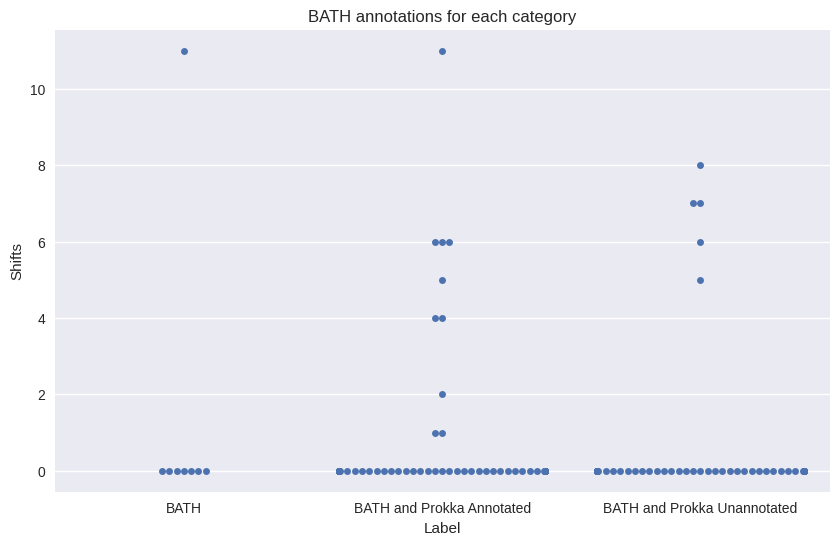

In [ ]:
plt.figure(figsize=(10, 6))
swarmplot = sns.swarmplot(x='label', y='shifts', data=frameshifts)
plt.title('BATH annotations for each category')
plt.xlabel('Label')
plt.ylabel('Shifts')
plt.show()

In [ ]:
#You need to find the areas annotated by BATH in regions that only prodigal annotates
#You also need to find BATH individual areas

In [ ]:
#You also need to quantify it somehow